In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import json
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
selected_keys=['symbol', 'sector', 'industry', 'longName', 'volume', 
                'profitMargins', 'sharesOutstanding', 'regularMarketPreviousClose', 
                'trailingPE', 'priceToBook', 'earningsQuarterlyGrowth']

In [12]:
tickersFrame = pd.read_csv('HKTickersInfo.csv')
for c in tickersFrame.columns: print(c)
tickersFrame=tickersFrame[selected_keys]
tickersFrame=tickersFrame.dropna()
tickersFrame=tickersFrame.astype({'trailingPE': 'float64'})
tickersFrame.set_index(['sector','symbol'], inplace=True)
tickersFrame.sort_index(inplace=True)
tickersFrame=tickersFrame.sort_values(by=['sector', 'trailingPE', 'priceToBook', 'earningsQuarterlyGrowth'], ascending=True).groupby('sector').head(1)
tickersFrame

symbol
zip
sector
fullTimeEmployees
longBusinessSummary
city
phone
state
country
companyOfficers
website
maxAge
address1
fax
industry
previousClose
regularMarketOpen
twoHundredDayAverage
trailingAnnualDividendYield
payoutRatio
volume24Hr
regularMarketDayHigh
navPrice
averageDailyVolume10Day
totalAssets
regularMarketPreviousClose
fiftyDayAverage
trailingAnnualDividendRate
open
averageVolume10days
expireDate
yield
algorithm
dividendRate
exDividendDate
beta
circulatingSupply
startDate
regularMarketDayLow
priceHint
currency
trailingPE
regularMarketVolume
lastMarket
maxSupply
openInterest
marketCap
volumeAllCurrencies
strikePrice
averageVolume
priceToSalesTrailing12Months
dayLow
ask
ytdReturn
askSize
volume
fiftyTwoWeekHigh
forwardPE
fromCurrency
fiveYearAvgDividendYield
fiftyTwoWeekLow
bid
tradeable
dividendYield
bidSize
dayHigh
exchange
shortName
longName
exchangeTimezoneName
exchangeTimezoneShortName
isEsgPopulated
gmtOffSetMilliseconds
quoteType
messageBoardId
market
annualHoldingsTurno

,,industry,longName,volume,profitMargins,sharesOutstanding,regularMarketPreviousClose,trailingPE,priceToBook,earningsQuarterlyGrowth
sector,symbol,,,,,,,,,
Basic Materials,2268.HK,Paper & Paper Products,Youyuan International Holdings Limited,121775000.0,0.16282,1.243030e+09,0.260,0.429231,0.529532,-0.428
Communication Services,1127.HK,Publishing,Lion Rock Group Limited,120000.0,0.09762,7.700000e+08,1.190,5.409091,0.886076,-0.043
Consumer Cyclical,0539.HK,Textile Manufacturing,Victory City International Holdings Limited,3553000.0,0.06692,7.769120e+08,0.350,0.599284,0.037338,0.493
Consumer Defensive,6183.HK,Packaged Foods,"China Greenfresh Group Co., Ltd.",1488000.0,0.12644,1.191380e+09,0.195,0.946184,0.716912,-0.070
Energy,1733.HK,Thermal Coal,E-Commodities Holdings Limited,876500.0,0.02008,3.041200e+09,0.350,1.223776,0.328947,-0.494
Financial Services,0138.HK,Capital Markets,CCT Fortis Holdings Limited,3.0,-0.00366,8.731110e+08,0.425,0.965909,0.125295,-0.927
Healthcare,3839.HK,Biotechnology,Chia Tai Enterprises International Limited,27000.0,0.15142,2.407180e+08,1.360,2.109643,1.729323,-0.549
Industrials,1500.HK,Engineering & Construction,In Construction Holdings Limited,110000.0,0.03276,8.300000e+08,0.180,1.395349,0.604027,0.330
Real Estate,0216.HK,Real Estate—Development,"Chinney Investments, Limited",32000.0,0.81222,0.000000e+00,2.350,1.661972,0.166104,-0.635


In [4]:
f=pd.DataFrame(columns=yf.Ticker('0115.HK').financials.transpose().columns)
f['symbol']=""
for t in tickersFrame.index:
    nf=yf.Ticker(t[1]).financials.transpose()
    nf['symbol']=t[1]
    f=f.append(nf)

In [4]:
f.index.names = ['Date']
f.set_index(['symbol']).groupby('symbol').head(1)
m=pd.merge(tickersFrame,f.set_index(['symbol']).groupby('symbol').head(1), on='symbol')
m

,industry,longName,volume,profitMargins,sharesOutstanding,regularMarketPreviousClose,trailingPE,priceToBook,Research Development,Effect Of Accounting Charges,...,Non Recurring,Other Items,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Discontinued Operations,Net Income From Continuing Ops,Net Income Applicable To Common Shares
symbol,,,,,,,,,,,,,,,,,,,,,
2268.HK,Paper & Paper Products,Youyuan International Holdings Limited,121775000,0.16282,1.243030e+09,0.260,0.429231,0.529532,None,None,...,None,None,2.66049e+08,4.05984e+09,2.81247e+09,2.41908e+09,-2.55642e+08,None,7.25678e+08,6.61041e+08
0745.HK,Advertising Agencies,China National Culture Group Limited,60000,-0.68323,9.814410e+09,0.013,0.838710,0.590909,None,None,...,None,None,-9.443e+06,8.9876e+07,9.8803e+07,6.8805e+07,-6.642e+07,None,-6.5904e+07,-6.5904e+07
8272.HK,Restaurants,Chinese Food and Beverage Group Limited,10000,4.73911,7.925400e+07,0.119,0.111007,0.915385,None,None,...,None,None,0,2.3152e+07,3.562e+07,1.9364e+07,9.7511e+07,NaN,8.5043e+07,8.5041e+07
6183.HK,Packaged Foods,"China Greenfresh Group Co., Ltd.",434000,0.12644,1.191380e+09,0.195,0.931627,0.705882,None,None,...,None,None,5.18e+06,1.00705e+09,8.93901e+08,8.35143e+08,3.9278e+07,None,1.47243e+08,1.43699e+08
1733.HK,Thermal Coal,E-Commodities Holdings Limited,132000,0.02008,3.041200e+09,0.350,1.241259,0.333647,None,None,...,None,None,3.0687e+07,3.28175e+10,3.17821e+10,3.12024e+10,-1.1161e+08,NaN,8.93026e+08,8.79772e+08
0263.HK,Capital Markets,GT Group Holdings Limited,114200,0.00000,1.401920e+08,0.200,0.289855,0.471698,None,None,...,None,None,2.544e+06,-2.27509e+08,1.01859e+08,134000,-4.12796e+08,NaN,-7.44708e+08,-7.44708e+08
3839.HK,Biotechnology,Chia Tai Enterprises International Limited,3504,0.15142,2.407180e+08,1.360,2.155505,1.766917,None,None,...,None,None,1.61e+06,9.3362e+07,9.0377e+07,6.6108e+07,2.1829e+07,None,2.3204e+07,2.1164e+07
3822.HK,Engineering & Construction,Sam Woo Construction Group Limited,200000,-0.08522,1.680000e+09,0.132,0.826629,0.349333,None,None,...,None,None,-7.127e+06,4.52268e+08,5.09914e+08,4.47886e+08,149000,None,-5.037e+07,-5.037e+07
0115.HK,Real Estate—Development,Grand Field Group Holdings Limited,610000,2.74388,2.449550e+09,0.101,0.199290,0.202405,None,None,...,None,None,1.2392e+08,6.8019e+07,8.344e+07,1.4856e+07,4.92063e+08,None,3.52722e+08,1.93255e+08


In [6]:
import matplotlib.dates as mdates
def pltdata(data, label):
    hsi=yf.Ticker('^HSI')
    hsidata=hsi.history(period='5y')
    fig=plt.figure()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(hsidata['Close']/hsidata.iloc[0]['Open']-1, linestyle='-', linewidth=1, label='HSI')
    plt.plot(data['Close']/data.iloc[0]['Open']-1, linestyle='--', linewidth=1, label=label)
    plt.legend()
    plt.show()

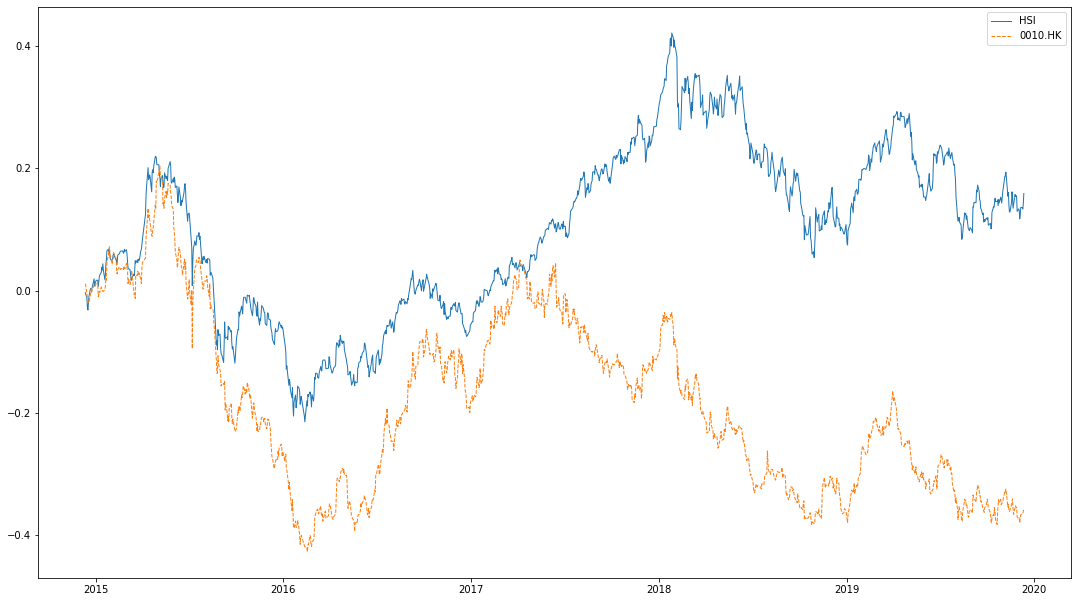

In [7]:
t=yf.Ticker('0010.HK')
data=(t.history(period='5y'))
pltdata(data,t.info['symbol'])

In [18]:
data=yf.download(['0010.HK','0020.HK'], period='5y')
data.mean(axis=1, level=0)
# pltdata(data,'Recommended Portfolio')

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-12-12,31.270232,36.103699,36.353451,35.828751,36.103451,734736.5
2014-12-15,30.990168,35.778749,35.903700,35.454000,35.778851,728992.0
2014-12-16,30.556578,35.279100,35.928551,35.229151,35.853600,1261804.5
2014-12-17,29.968972,34.604851,35.678902,34.455000,35.304150,2233546.0
2014-12-18,30.252848,34.929399,35.179201,34.729601,34.879551,1603908.0
...,...,...,...,...,...,...
2019-12-06,33.920000,33.920000,34.180000,33.645000,33.980000,647081.5
2019-12-09,34.105000,34.105000,34.370000,33.539999,34.220000,607048.0
2019-12-10,33.775001,33.775001,34.325001,33.480000,34.325001,649715.0


In [ ]:
t.actions
t.balance_sheet
t.financials
t.cashflow
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show balance heet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show options expirations


# get option chain for specific expiration
# opt = msft.option_chain('2019-12-06')
# data available via: opt.calls, opt.puts

msft.earnings['ProfitRatio']=msft.earnings['Earnings']/msft.earnings['Revenue']

data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30",
                   group_by="ticker")